In [1]:
# Download the lambda virus genome

!python -m wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/lambda_virus.fa


Saved under lambda_virus (1).fa


In [2]:
# Read the genome

def read_genome(genome_file):
    genome = ''
    with open(genome_file,'r') as genome_file_handle:
        for genome_line in genome_file_handle:
            if not genome_line[0] == '>':
                genome += genome_line.rstrip()
    
    return genome

genome = read_genome("lambda_virus (1).fa")

In [4]:
# Reverse complement of a read/sequence

def get_reverse_complement(s1):
    compl_str = ''
    complement = {'A':'T', 'C':'G', 'G':'C', 'T':'A', 'N':'N'}
    for i in range(len(s1)):
        nuc_at_i = s1[i]
        comp_at_i = complement[nuc_at_i]
        compl_str = comp_at_i + compl_str
    
    return compl_str

In [13]:
# 'p' is the fragment of string (pattern) we want to match against the 't' (text) of reference genome
# We modify this algorithm to add a feature that also matches the reverse complement of p against the genome

def sw_naive_exact(p, t):
    occurrences = [] # keep track of indices where p matches t
    
    p_rev_comp = get_reverse_complement(p)
    
    for i in range(len(t) - len(p) + 1): # every position in t where p could start without running past the end of t 
        match = True
        
        for j in range(len(p)):
            if not (t[i+j] == p[j] or t[i+j] == p_rev_comp[j]) :
                match = False
                break
        
        if match:
            occurrences.append(i)
    
    return occurrences

# test

p = 'AGTCGA' # reverse complement would be TGA
#t = 'ATTCAATCAGTGA'

ne_matches = sw_naive_exact(p, genome)
print(ne_matches)
#print(len(ne_matches))
print(min(ne_matches))

[49, 117, 144, 151, 401, 417, 444, 450, 457, 529, 573, 909, 1325, 1332, 1349, 1462, 1483, 1566, 1688, 1806, 1816, 1908, 2037, 2079, 2205, 2470, 2472, 2547, 2635, 2706, 2729, 3049, 3259, 3268, 3295, 3489, 3616, 3658, 3937, 3979, 4003, 4006, 4054, 4087, 4192, 4258, 4285, 4408, 4457, 4521, 4589, 4626, 4805, 4898, 5021, 5219, 5234, 5429, 5532, 5547, 5864, 5969, 6026, 6135, 6141, 6406, 6495, 6606, 6657, 6702, 6777, 6816, 6849, 6868, 6876, 7029, 7152, 7193, 7196, 7349, 7490, 7583, 7841, 7977, 8055, 8184, 8245, 8261, 8591, 8708, 8792, 8858, 8902, 9033, 9062, 9111, 9120, 9130, 9152, 9204, 9243, 9259, 9452, 9501, 9861, 9888, 10174, 10530, 10555, 10608, 10619, 10666, 10776, 10842, 10845, 10929, 10944, 11049, 11175, 11199, 11266, 11421, 11438, 11505, 11547, 11679, 11775, 11907, 11994, 12094, 12111, 12147, 12150, 12157, 12175, 12343, 12433, 12449, 12594, 12838, 12927, 13075, 13259, 13271, 13274, 13523, 13877, 13882, 13933, 13966, 14187, 14566, 14603, 14751, 14797, 14902, 15071, 15086, 15298, 15371

In [16]:
# more forgving version of naive exact, allowing up to 2 mismatches (disregarding the reverse complement)

def naive_exact_2mm(p, t):
    occurrences = [] # keep track of indices where p matches t
    
    for i in range(len(t) - len(p) + 1): # every position in t where p could start without running past the end of t 
        match = True
        
        mismatch_counter = 0
        for j in range(len(p)):
            if not (t[i+j] == p[j]) :
                mismatch_counter += 1
                
                if mismatch_counter > 2:
                    match = False
                    break
        
        if match:
            occurrences.append(i)
    
    return occurrences

p = 'AGGAGGTT' # reverse complement would be TGA
#t = 'ATTCAATCAGTGA'

ne_matches = naive_exact_2mm(p, genome)
print(ne_matches)
#print(len(ne_matches))
print(min(ne_matches))

[49, 282, 299, 302, 380, 1560, 1650, 2235, 2277, 2400, 2562, 2565, 2729, 2823, 3160, 3181, 3946, 4210, 4294, 4309, 4405, 4580, 5069, 5159, 5189, 5231, 5331, 5519, 5737, 5882, 5993, 5996, 6011, 6312, 6522, 6585, 6606, 7316, 7394, 7819, 7904, 7966, 7998, 8534, 8648, 8946, 9339, 9354, 9530, 9842, 9966, 10041, 10250, 10416, 10445, 10484, 10527, 10874, 11193, 11292, 11505, 11568, 11655, 11745, 11838, 12078, 12180, 12222, 12697, 12745, 12819, 12880, 12935, 13011, 13087, 13256, 13415, 13526, 13813, 14259, 15385, 15473, 16192, 17101, 17437, 17755, 17936, 17989, 18016, 18040, 18727, 18853, 18911, 19232, 19263, 19310, 19833, 19929, 19932, 19947, 19980, 20793, 20802, 21305, 21528, 21627, 21684, 22414, 22660, 22670, 22787, 23326, 24063, 24145, 24409, 24595, 24681, 25120, 25139, 25210, 25381, 25384, 25648, 25664, 25773, 25987, 26196, 26208, 26576, 26587, 26653, 26736, 27892, 27967, 28042, 28622, 28840, 28976, 29119, 30029, 30530, 30673, 30902, 31619, 31645, 31682, 31843, 31859, 32069, 33180, 33365,

In [20]:
# Let's find a problemic cycle in the set of reads
!python -m wget https://d28rh4a8wq0iu5.cloudfront.net/ads1/data/ERR037900_1.first1000.fastq

# Read the fastQ file
def read_fastQ(file_name):
    seq_list  = []
    qual_list = []
    
    with open(file_name,'r') as fastq_handle:
        while True:
            fastq_handle.readline() # the first line, we don't really care what it is
            sequence = fastq_handle.readline().rstrip()
            fastq_handle.readline() # again, a placeholder that we're not concerned about
            quality = fastq_handle.readline().rstrip()
            
            if len(sequence) == 0:
                break
                
            seq_list.append(sequence)
            qual_list.append(quality)
    
    return seq_list, qual_list

real_reads, qual_reads = read_fastQ("ERR037900_1.first1000.fastq")


Saved under ERR037900_1.first1000 (1).fastq


In [28]:
# convert phred33 to Q
def phred33_to_Q(qual):
    return ord(qual) - 33

def average_read_length(read_list):
    avg_length = 0
    for read in read_list:
        avg_length += len(read)
    avg_length /= len(read_list)
    return avg_length

read_len_avg = average_read_length(real_reads)
print(read_len_avg)
        
# Assess the qualities across all reads. How many high/low quality readings are there?
# Generate distribution of quality values.
def avg_Q_in_each_offset(qual_list):
    Q_list = [0]*100
    for qual in qual_list:
        for i in range(len(qual)):
            phred = qual[i]
            converted_q = phred33_to_Q(phred)
            #print(converted_q)
            Q_list[i] += converted_q
            
    
    for j in range(len(Q_list)):
        Q_list[j] /= 100
        
    return Q_list

avg_Q_list = avg_Q_in_each_offset(qual_reads)
print(avg_Q_list)

# What is the lowest average Q value in this list, and what index (i.e., offset of reads or cycle) does it exist?

min_Q = min(avg_Q_list)

for k in range(len(avg_Q_list)):
    if avg_Q_list[k] == min_Q:
        print(k)

#qual_hist = create_histogram(qual_reads)
#print(qual_hist)

100.0
[384.35, 384.6, 384.0, 384.28, 384.17, 383.82, 383.62, 383.64, 383.25, 383.43, 381.94, 381.54, 380.89, 381.52, 381.53, 380.99, 380.55, 380.41, 380.67, 381.5, 380.87, 379.89, 380.09, 379.09, 380.28, 375.76, 375.14, 375.03, 375.78, 375.52, 376.29, 375.55, 375.48, 374.33, 374.02, 373.43, 371.98, 371.26, 371.58, 369.04, 367.42, 366.77, 366.45, 364.93, 365.09, 363.75, 362.05, 359.74, 358.47, 356.73, 348.32, 347.39, 343.99, 344.02, 340.25, 330.25, 328.82, 327.41, 325.73, 322.24, 308.05, 306.66, 303.43, 301.31, 294.63, 178.91, 45.26, 178.81, 178.65, 178.52, 174.66, 171.31, 171.34, 170.98, 168.52, 237.45, 239.58, 232.21, 229.02, 223.66, 209.04, 205.84, 203.83, 197.67, 190.95, 180.61, 177.57, 171.52, 169.72, 162.86, 148.11, 146.79, 143.1, 141.52, 137.34, 125.38, 122.78, 121.79, 116.76, 115.61]
66


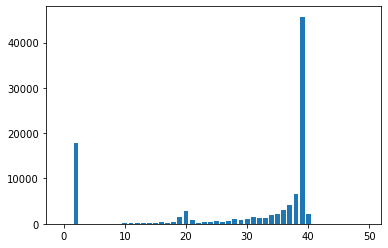

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(qual_hist)), qual_hist)
plt.show()